In [39]:
# TODO COUNT how many pictures per class
# TODO run raw imagenet to see what it says
# TODO try with 10, 50, 100 images
# TODO run a basic ML model to see performance

In [40]:
import numpy as np
import pandas as pd

import keras,os
from keras.layers import Conv2D, MaxPool2D,Dropout,Flatten,Dense
from keras.preprocessing import image 
from keras.models import Sequential

In [41]:
train_data_gen = image.ImageDataGenerator(rescale= 1./255, validation_split=0.2)
train = train_data_gen.flow_from_directory(directory="casting_512x512/casting_512x512/" , target_size=(256,256) , batch_size=32, class_mode = 'binary', subset='training')
test = train_data_gen.flow_from_directory(directory="casting_512x512/casting_512x512/" , target_size=(256,256) , batch_size=32, class_mode = 'binary', subset='validation')

Found 1041 images belonging to 2 classes.
Found 259 images belonging to 2 classes.


In [42]:
# test data should be taken from train data
print(train.class_indices)
print(test.class_indices)


{'def_front': 0, 'ok_front': 1}
{'def_front': 0, 'ok_front': 1}


In [43]:
from tensorflow.keras.applications import Xception
xcept = Xception(input_shape = (256, 256, 3), include_top = False, weights = 'imagenet')

In [47]:
for layer in xcept.layers:
    layer.trainable = False


model=keras.Sequential([
    xcept,
    keras.layers.Flatten(),
    keras.layers.Dense(units=256, activation="relu"),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(units=1, activation="sigmoid"),
])

model.compile(optimizer="adam",loss='binary_crossentropy',metrics=['accuracy'])

In [48]:
model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 8, 8, 2048)        20861480  
                                                                 
 flatten_3 (Flatten)         (None, 131072)            0         
                                                                 
 dense_6 (Dense)             (None, 256)               33554688  
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_7 (Dense)             (None, 1)                 257       
                                                                 
Total params: 54,416,425
Trainable params: 33,554,945
Non-trainable params: 20,861,480
_________________________________________________________________


In [49]:
model.fit_generator(train,epochs=10,steps_per_epoch=7,validation_data=test,validation_steps=len(test))

/tmp/ipykernel_203/3462666998.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(train,epochs=10,steps_per_epoch=7,validation_data=test,validation_steps=len(test))


Epoch 1/10
7/7 [==============================] - 49s 6s/step - loss: 16.9857 - accuracy: 0.5804 - val_loss: 9.5239 - val_accuracy: 0.7259
Epoch 2/10
7/7 [==============================] - 36s 5s/step - loss: 5.0396 - accuracy: 0.7500 - val_loss: 1.0522 - val_accuracy: 0.8301
Epoch 3/10
7/7 [==============================] - 37s 6s/step - loss: 1.8345 - accuracy: 0.7812 - val_loss: 1.9415 - val_accuracy: 0.7220
Epoch 4/10
7/7 [==============================] - 34s 5s/step - loss: 1.1613 - accuracy: 0.7990 - val_loss: 0.5721 - val_accuracy: 0.9035
Epoch 5/10
7/7 [==============================] - 34s 5s/step - loss: 0.4402 - accuracy: 0.9152 - val_loss: 0.1707 - val_accuracy: 0.9459
Epoch 6/10
7/7 [==============================] - 33s 5s/step - loss: 0.3787 - accuracy: 0.9043 - val_loss: 0.3325 - val_accuracy: 0.8842
Epoch 7/10
7/7 [==============================] - 34s 5s/step - loss: 0.3213 - accuracy: 0.8947 - val_loss: 0.4808 - val_accuracy: 0.8069
Epoch 8/10
7/7 [=================

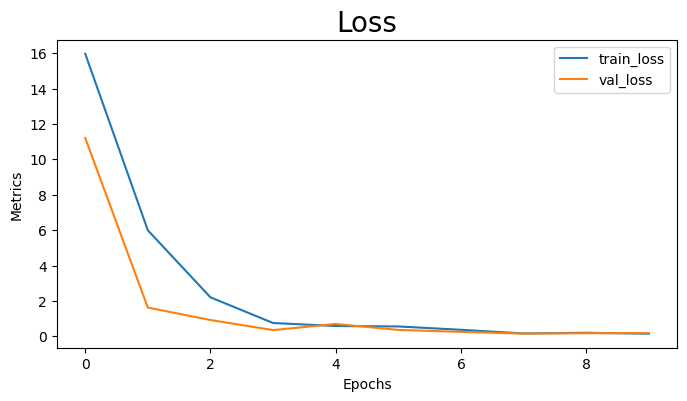

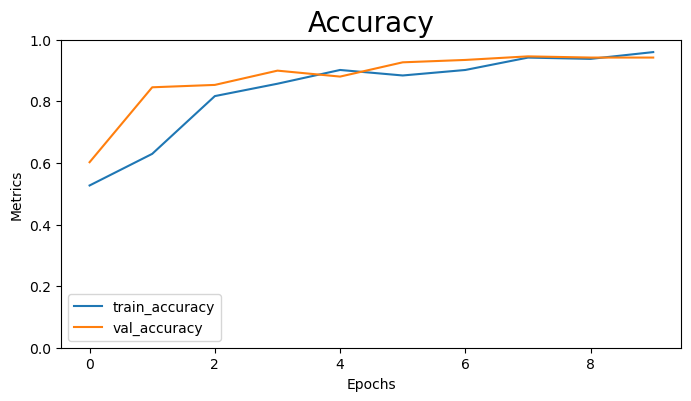

In [28]:
import matplotlib.pyplot as plt
# plot loss
plt.subplots(figsize = (8, 4))
X = range(1, 1+len(model.history.epoch))
plt.plot(model.history.history["loss"])
plt.plot(model.history.history["val_loss"])
plt.title("Loss", fontsize = 20)
plt.xlabel("Epochs")
plt.ylabel("Metrics")
plt.legend(labels = ['train_loss', 'val_loss'])
plt.show()

# plot accuracy
plt.subplots(figsize = (8, 4))
plt.plot(model.history.history["accuracy"])
plt.plot(model.history.history["val_accuracy"])
plt.title("Accuracy", fontsize = 20)
plt.xlabel("Epochs")
plt.ylabel("Metrics")
plt.ylim(0,1)
plt.legend(labels = ['train_accuracy', 'val_accuracy'])
plt.show()

In [38]:
#### TODO predict on all images to see what comes out


#from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.xception import preprocess_input, decode_predictions
import numpy as np

model = Xception(input_shape = (299, 299, 3), weights='imagenet')

img_path = 'casting_512x512/casting_512x512/ok_front/cast_ok_0_1018.jpeg'
#img_path = 'casting_512x512/casting_512x512/def_front/cast_def_0_0.jpeg'
img = image.load_img(img_path, target_size=(299, 299))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model.predict(x)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
print('Predicted:', decode_predictions(preds, top=3)[0])

1/1 [==============================] - 0s 440ms/step
Predicted: [('n03843555', 'oil_filter', 0.31126547), ('n04553703', 'washbasin', 0.22433704), ('n04019541', 'puck', 0.09062061)]
